<a href="https://colab.research.google.com/github/chettkulkarni/MachineLearning/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Random Forest 

In [0]:
#Import Necessary Libraries
import requests
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
# Read csv file into colaboratory
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1acpzg9EPc-0AO2gFYSiPD_wqVQtyqeYT'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='


downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Fire.csv')


1acpzg9EPc-0AO2gFYSiPD_wqVQtyqeYT
1acpzg9EPc-0AO2gFYSiPD_wqVQtyqeYT


## Preprocess the Fire Dataset

In [0]:
# Read the csv file and create a dataframe
df=pd.read_csv('Fire.csv')

In [0]:
df1 = df.drop(columns=['Unnamed: 0'])

In [0]:
# Find the Correlation between various features
cor=df1.corr()

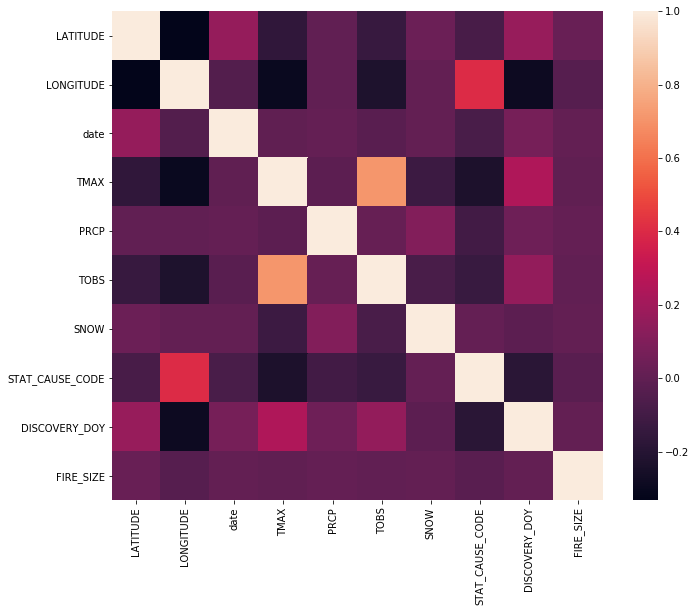

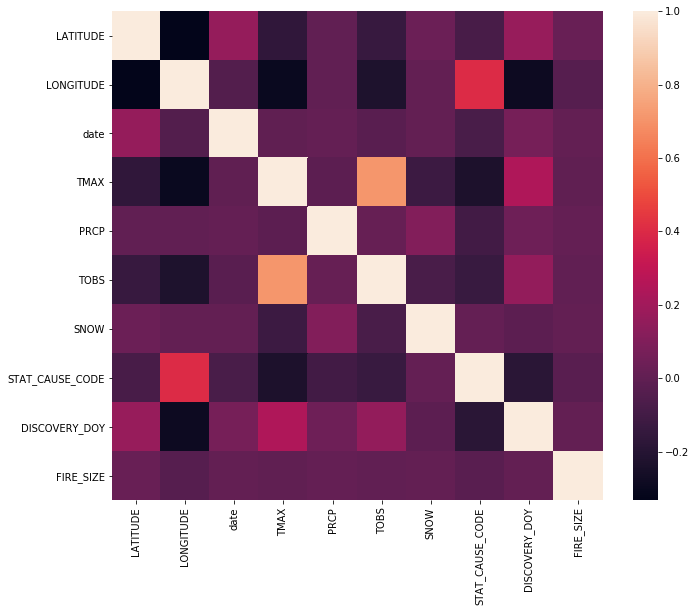

In [0]:
# Heatmap to show the correllation between the features in the Fire dataset
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(cor)

In [0]:
df1

,LATITUDE,LONGITUDE,date,TMAX,PRCP,TOBS,SNOW,STAT_CAUSE_CODE,DISCOVERY_DOY,FIRE_SIZE
0,19.0,-155.0,19960110,205.500000,0.000000,139.000000,0.0,9.0,5,5.0
1,19.0,-155.0,19960609,211.000000,195.000000,183.000000,0.0,9.0,159,5.0
2,19.0,-155.0,19960612,233.500000,0.000000,172.000000,0.0,4.0,164,0.1
3,19.0,-155.0,19960903,227.500000,135.800000,194.000000,0.0,4.0,247,0.1
4,19.0,-155.0,19961217,172.000000,4.400000,111.000000,0.0,4.0,352,0.1
...,...,...,...,...,...,...,...,...,...,...
389982,65.0,-148.0,19980701,278.900000,5.307692,188.142857,0.0,1.0,182,2.0
389983,65.0,-148.0,19980831,153.222222,6.230769,89.000000,0.0,1.0,185,857.0
389984,65.0,-147.0,19980506,150.200000,0.000000,62.500000,0.0,7.0,120,80.0
389985,65.0,-147.0,19980613,182.750000,16.333333,127.750000,0.0,7.0,150,15.0


,LATITUDE,LONGITUDE,date,TMAX,PRCP,TOBS,SNOW,STAT_CAUSE_CODE,DISCOVERY_DOY,FIRE_SIZE
0,19.0,-155.0,19960110,205.500000,0.000000,139.000000,0.0,9.0,5,5.0
1,19.0,-155.0,19960609,211.000000,195.000000,183.000000,0.0,9.0,159,5.0
2,19.0,-155.0,19960612,233.500000,0.000000,172.000000,0.0,4.0,164,0.1
3,19.0,-155.0,19960903,227.500000,135.800000,194.000000,0.0,4.0,247,0.1
4,19.0,-155.0,19961217,172.000000,4.400000,111.000000,0.0,4.0,352,0.1
...,...,...,...,...,...,...,...,...,...,...
389982,65.0,-148.0,19980701,278.900000,5.307692,188.142857,0.0,1.0,182,2.0
389983,65.0,-148.0,19980831,153.222222,6.230769,89.000000,0.0,1.0,185,857.0
389984,65.0,-147.0,19980506,150.200000,0.000000,62.500000,0.0,7.0,120,80.0
389985,65.0,-147.0,19980613,182.750000,16.333333,127.750000,0.0,7.0,150,15.0


In [0]:
df1['STAT_CAUSE_CODE'].unique()

array([ 9.,  4.,  3.,  1.,  7.,  5.,  2., 12., 10.,  8., 11., 13.,  6.])

array([ 9.,  4.,  3.,  1.,  7.,  5.,  2., 12., 10.,  8., 11., 13.,  6.])

In [0]:
X=df1.loc[:, df1.columns != 'STAT_CAUSE_CODE']
X.head()

,LATITUDE,LONGITUDE,date,TMAX,PRCP,TOBS,SNOW,DISCOVERY_DOY,FIRE_SIZE
0,19.0,-155.0,19960110,205.5,0.0,139.0,0.0,5,5.0
1,19.0,-155.0,19960609,211.0,195.0,183.0,0.0,159,5.0
2,19.0,-155.0,19960612,233.5,0.0,172.0,0.0,164,0.1
3,19.0,-155.0,19960903,227.5,135.8,194.0,0.0,247,0.1
4,19.0,-155.0,19961217,172.0,4.4,111.0,0.0,352,0.1


,LATITUDE,LONGITUDE,date,TMAX,PRCP,TOBS,SNOW,DISCOVERY_DOY,FIRE_SIZE
0,19.0,-155.0,19960110,205.5,0.0,139.0,0.0,5,5.0
1,19.0,-155.0,19960609,211.0,195.0,183.0,0.0,159,5.0
2,19.0,-155.0,19960612,233.5,0.0,172.0,0.0,164,0.1
3,19.0,-155.0,19960903,227.5,135.8,194.0,0.0,247,0.1
4,19.0,-155.0,19961217,172.0,4.4,111.0,0.0,352,0.1


In [0]:
Y=df1['STAT_CAUSE_CODE']
Y.head()

0    9.0
1    9.0
2    4.0
3    4.0
4    4.0
Name: STAT_CAUSE_CODE, dtype: float64

0    9.0
1    9.0
2    4.0
3    4.0
4    4.0
Name: STAT_CAUSE_CODE, dtype: float64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

## Train the Model

In [0]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred = dt.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

51.95441911033159

51.955444782916395

In [0]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)*100

52.43751089777121

52.36981650717458

In [0]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100) 
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[20367   577   315   963   683   112   521   264  1161   104    73    14
    458]
 [  577  1128   226   314   792    64   583   239   885    44    67    35
     63]
 [  333   250   313   248   560    31   359   126   517    30    17    11
     49]
 [ 1061   343   270  1689   508    51   412   141   743    40    24     8
    115]
 [  749   937   642   612  8061   208  3413   851  1617   101    94    49
    144]
 [  108    52    23    40   178   283   103    21    72     5     8     1
     18]
 [  534   645   398   391  3418   123  7587   390  1677   119    79    26
    234]
 [  238   250   145   170   835    31   419   760   388    54    26    33
     30]
 [ 1295   909   551   841  1620    80  1677   414  5733    83   110    17
    153]
 [  120    51    33    46    79     9   102    55    66   332    10     3
      4]
 [   73    70    25    26    60    10    68    17   111     7    57     5
      5]
 [   10    44     7    10    57     0    28    19    20     7     3 

In [0]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = clf.predict(X_test)
print("Predicted values:") 
print(y_pred) 

Predicted values:
[7. 5. 1. ... 7. 9. 9.]
Predicted values:
[7. 5. 1. ... 7. 9. 9.]


## Evaluate the Random Forest Classifier Model

In [0]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100) 
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[23055   210    81   459   442    11   333    81   714    40    14     3
    169]
 [  794  1057    92   254   958    18   529   154  1063    27    22    18
     31]
 [  409   181   175   296   683     7   348    77   606    25     9     2
     26]
 [ 1443   185   106  1859   603    12   326    65   723    16     5     2
     60]
 [  810   497   226   378 10091    69  3335   560  1279    58    34    21
    120]
 [  139    33     6    34   237   259   109     9    66     6     4     0
     10]
 [  551   332   123   221  3327    35  8874   245  1611    54    25     9
    214]
 [  306   172    62   137  1007    13   381   788   428    41     4    18
     22]
 [ 1500   660   211   699  1657    21  1469   260  6826    55    33     6
     86]
 [  177    22    18    20    87     2   107    36    78   359     0     2
      2]
 [  102    47    11    17    69     4    49     8   167     3    51     2
      4]
 [   12    24     3     6    74     0    25    26    32     5     1 

## Result

Random Forest Classifier gave better result than Decision Tree with an accuracy of `59.87%` whereas Decision Tree gave an accuracy of `51.85%`

Precision for Rforest for many different cases ranged from 10% to 79%
Precision for Dtree for many different cases ranged from 10% to 77% ,

so in total rForest is performing better,

We think we have too many categories to categorize, we might try to reduce the number of categories(club closely related categories,in the next iteration)